In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scaler = StandardScaler()
df = pd.read_csv("processed_tables/merged_no_dams.csv")
exogen_data_df = df.drop(["energy_price", "Date"], axis=1)
scaled_data = scaler.fit_transform(exogen_data_df)

In [3]:
n_components = 2
pca = PCA(n_components=n_components)  # n_components is the number of components to keep
pca_result = pca.fit_transform(scaled_data)

In [4]:
pca_df = pd.DataFrame(
    data=pca_result, columns=["Principal Component 1", "Principal Component 2"]
)
pca_df

,Principal Component 1,Principal Component 2
0,-0.214875,2.368099
1,-2.175956,4.164147
2,-3.845750,3.628637
3,-2.350394,3.747341
4,2.160858,4.436559
...,...,...
639,-6.525728,1.711666
640,-7.067561,2.135979
641,-5.090115,1.526266
642,-7.840461,0.337948


## Varianza explicada por las dos componentes principales


In [5]:
explained_variance = np.sum(pca.explained_variance_)
print(
    f"Varianza explicada por las {n_components} componentes: {round(explained_variance, 2)}%"
)

Varianza explicada por las 2 componentes: 24.37%


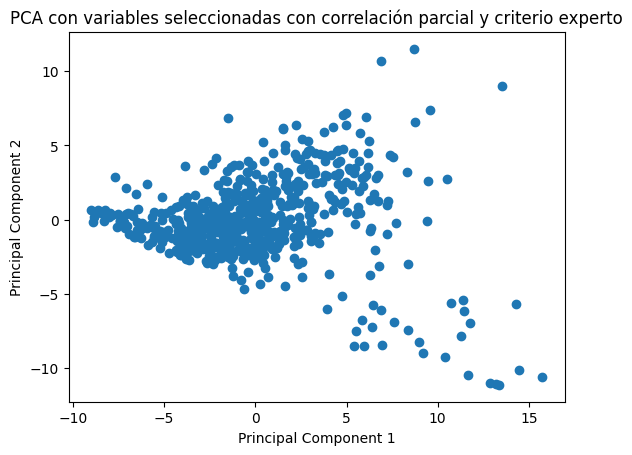

In [6]:
plt.scatter(pca_df["Principal Component 1"], pca_df["Principal Component 2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA con variables seleccionadas con correlación parcial y criterio experto")
plt.show()